<a href="https://colab.research.google.com/github/Daddypeak/NLP/blob/main/%EC%98%A4%EB%94%94%EC%98%A4_%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchaudio

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import librosa
import librosa.display
import torch
import torchaudio
import IPython.display as ipd

<ipython-input-41-2b8ad6e4d21f>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [ ]:
train_dataset = torchaudio.datasets.LIBRISPEECH("./", url="train-clean-100", download=True)
test_dataset = torchaudio.datasets.LIBRISPEECH("./", url="test-clean", download=True)


100%|██████████| 331M/331M [00:20<00:00, 17.1MB/s]


In [ ]:
test_dataset[1]

(tensor([[ 0.0010,  0.0011,  0.0009,  ..., -0.0007, -0.0010, -0.0011]]),
 16000,
 'STUFF IT INTO YOU HIS BELLY COUNSELLED HIM',
 1089,
 134686,
 1)

In [ ]:
test_dataset[1][0].shape

torch.Size([1, 52400])

# 샘플링

In [ ]:
audio_data = test_dataset[1][0][0]
sr = test_dataset[1][1]

print(audio_data, sr)
print('length:', len(audio_data))
print('duration:', len(audio_data)/sr)

ipd.Audio(audio_data, rate=sr)

tensor([ 0.0010,  0.0011,  0.0009,  ..., -0.0007, -0.0010, -0.0011]) 16000
length: 52400
duration: 3.275


# Resampling

In [ ]:
audio_np = audio_data.numpy()
y_8k = librosa.resample(audio_np, sr, 8000)

print(len(audio_np), len(y_8k))
ipd.Audio(y_8k, rate=8000)

TypeError: ignored

In [ ]:
audio_np = audio_data.numpy()
y_4k = librosa.resample(audio_np, sr, 4000)

print(len(audio_np), len(y_4k))
ipd.Audio(y_4k, rate=4000)

TypeError: ignored

# Normalization&Quantization

In [ ]:
audio_np = audio_data.numpy()
normed_wav = audio_np/max(np.abs(audio_np))
ipd.Audio(normed_wav, rate=sr)

In [ ]:
bit = 8
max_value = 2**(bit-1)

quantized_8_wav = normed_wav * max_value
quantized_8_wav = np.round(quantized_8_wav).astype(int)
quantized_8_wav = np.clip(quantized_8_wav, -max_value, max_value-1)
ipd.Audio(quantized_8_wav, rate=sr)

# Mu-Law Encoding(사람 귀에 적절하게 만들어줌)

In [ ]:
def mu_law(x, mu=255):
  return np.sign(x)*np.log(1+mu*np.abs(x))/np.log(1+mu)

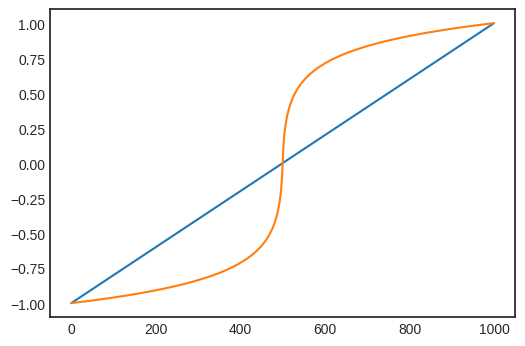

In [ ]:
x = np.linspace(-1, 1, 1000)
x_mu = mu_law(x)

plt.figure(figsize=[6,4])
plt.plot(x)
plt.plot(x_mu)
plt.show()

In [ ]:
wav_mulaw = mu_law(normed_wav)
ipd.Audio(wav_mulaw, rate=sr)

# 오디오 표현

In [ ]:
audio_np = audio_data.numpy()

fig = plt.figure(figsize=(14,6))
librosa.display.waveplot(audio_np[0:100000], sr=sr)

AttributeError: ignored

<Figure size 1400x600 with 0 Axes>

In [ ]:
def Sinusoid(A, f, phi, fs, t):
  t = np.arange(0,t,1.0/fs)
  x = A*np.cos(2*np.pi*f*t+phi)
  return x

In [ ]:
A = 0.9
f = 340
phi = np.pi/2
fs = 22050
t = 1

In [ ]:
sin = Sinusoid(A,f,phi,fs,t)

In [ ]:
A = 0.9
f = 260
phi = np.pi/2
fs = 22050
t = 1

In [ ]:
sin2 = Sinusoid(A,f,phi,fs,t)

In [ ]:
complexwav = sin + sin2

In [ ]:
fig = plt.figure(figsize=(14,6))
librosa.display.waveplot(complexwav[0:1000], sr=fs)

AttributeError: ignored

<Figure size 1400x600 with 0 Axes>

In [ ]:
ipd.Audio(sin+sin/2+sin/4, rate=fs)

In [ ]:
ipd.Audio(sin2+sin2/2+sin2/4, rate=fs)

In [ ]:
def generate_sinusoid_scale(pitches=[69], duration=0.5, fs=22050, amplitude_max=0.5):
  N=int(duration*fs)
  t=np.arange(N)/fs
  x=[]
  for p in pitches:
    omega = 2**((p-69)/12)*440
    x = np.append(x, np.sin(2*np.pi*omega*t))
  x = amplitude_max*x/np.max(x)
  return x

In [ ]:
duration = 1
fs = 22050
pitches = [36, 48, 60, 72, 84, 96]
x = generate_sinusoid_scale(pitches=pitches, duration=duration, fs=fs)
print('Pitch class C = {..., C1, C2, C3, C4, C5, C6, ...}')
ipd.Audio(data=x, rate=fs)

Pitch class C = {..., C1, C2, C3, C4, C5, C6, ...}
